### PART 1 // Imports and first global data visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data_src = pd.read_csv('src/Speed Dating Data.csv',encoding = "ISO-8859-1")

In [4]:
data_src

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


The dataset has 8378 rows, Ok... that's small...
but there are 195 columns! Ok, let's see the documentation!...
In the documentation, it is not easy to understand all the mechanisms of this dataset.
A row is an encounter between a woman and a man, from the point of view of one person.
So, in another part of the dataset, we have a row for the same encounter (the opposite sex) but with more information (favorite activities, career, survey responses, etc...) for that opposite sex person. It's like a "semi-mirror" structure.

After reading the documentation and understanding all the parameters, we try to see if we can't remove some of them:

In [5]:
pd.options.display.max_rows = 999
Na_columns = data_src.isnull().sum()
print(Na_columns)

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

We can open this list in a text editor... Some columns have empty cells... especially for the survey columns, and especially the last survey, and questions 5 and 7...
One of the goals of this study will be to see if we can use these surveys. So, we will not delete everything, but only the columns that have more than 6000 empty cells (this is also because question 7 of the surveys is an "introspective" question, redundant with the other questions, and will be difficult to exploit)

In [6]:
data_src.drop(columns=[col for col in Na_columns.index if Na_columns[col]>=6000],inplace=True)

In the follow-up study of the dataset, we encountered many errors:
- line shift errors (for only three iids)
- many false documentation in the surveys ... (we will expose it later)

Now, let's see, on a "rather crude" approach, where we can look for possible correlations...
Ok, let's look at a big correlation map!... (Don't be afraid)

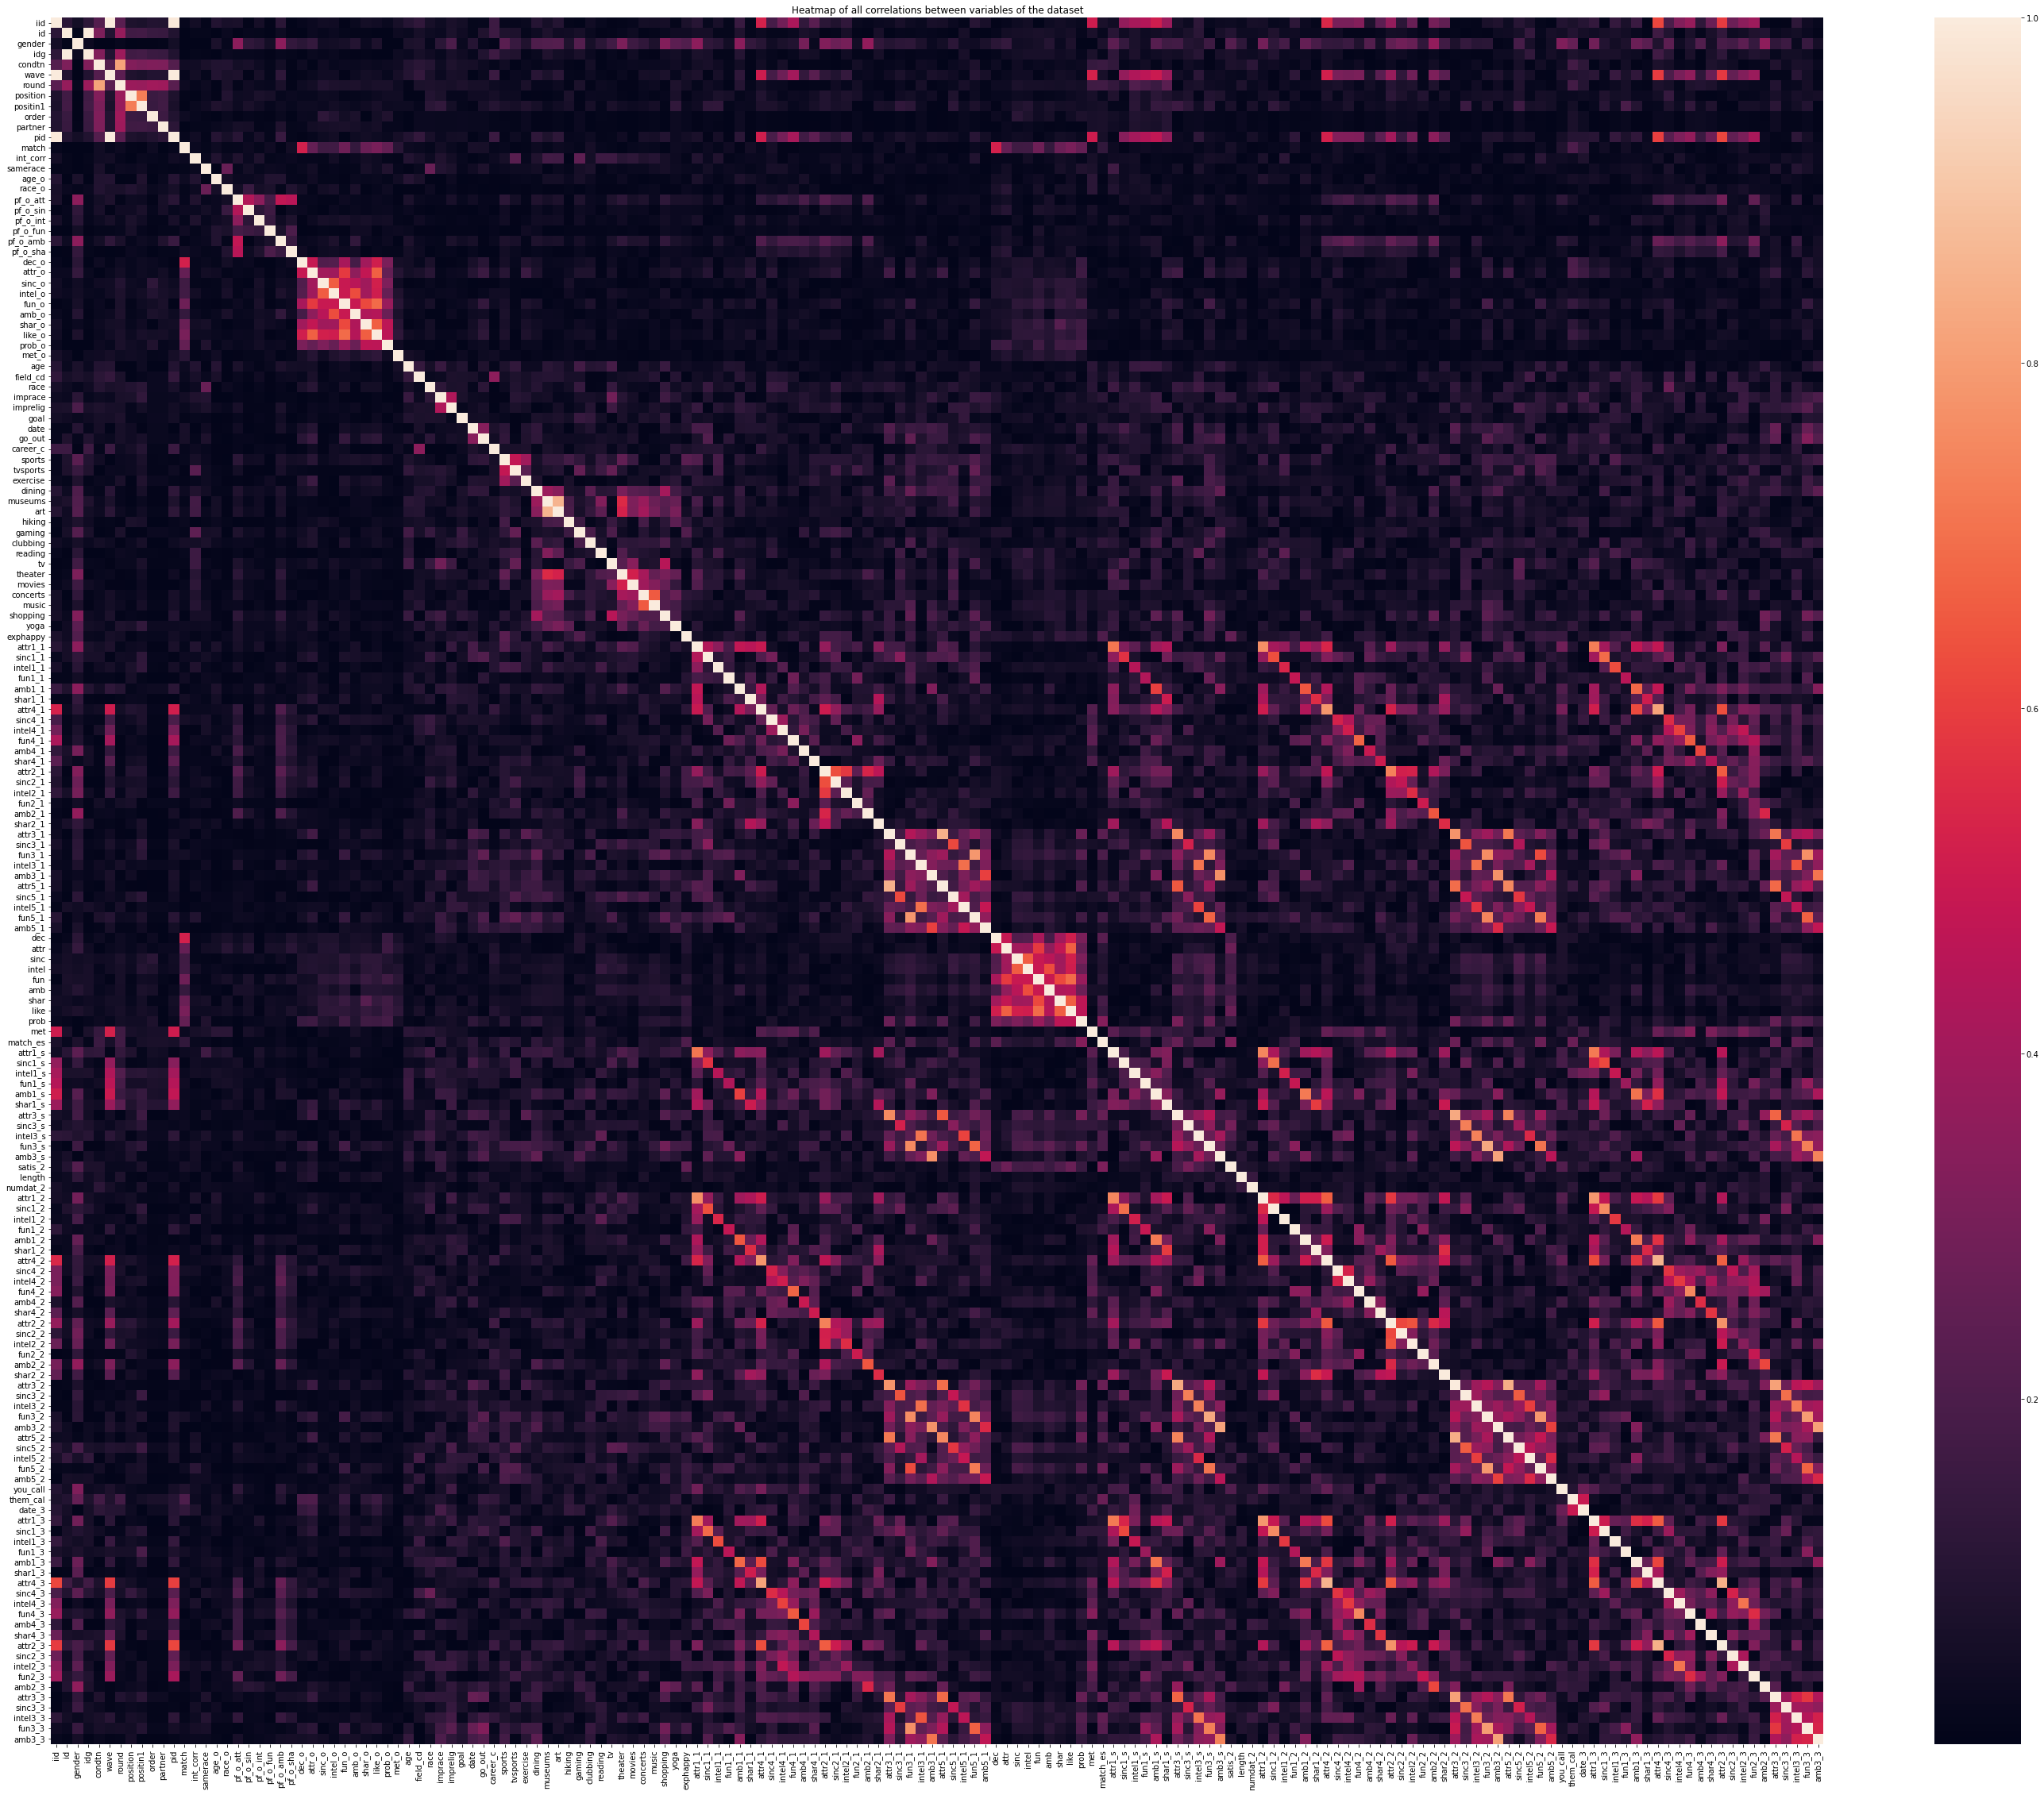

In [8]:
data_corr = data_src.corr()
plt.figure(figsize=(50,40))
plt.title("Heatmap of all correlations between variables of the dataset")
sns.heatmap(abs(data_corr))
plt.show()

It's a big, big, big ... heatmap, very beautiful !... But how can we exploit it?
It's not really necessary, because in other parts of this EDA study, we will only observe the correlation with the variables "dec", "dec_o", "match" and "date_3"...

So, this is just to take some information:
It's not very easy to see the information... (you can open it on your favorite image processing software) and we can notice that :
- you can see big isolated correlations... For example: "art" and "museums", "music" and "concerts"... ok that makes sense... Someone who likes one can like the other...
- we have "mechanical correlations" between "wave", "round", "pid", "dec" and "match"... Ok, that makes sense too, it's just a process question.
- we have many visible heat squares of 6x6 pixels or 10x10 pixels... These are our surveys! Survey 1 responses will be correlated to survey 2 responses, etc... A person does not seem to give very different answers from one survey to another for the same question. We will confirm this later, when we want to exploit the different surveys ....


### PART 2 / The speed dating night : how do men and women make decisions ? what could constitute a "match" ? 

For this part, we just look at the first part of the experiment, the speed dating evening, from the first survey to the "match". With all the families of parameters presented (activities, affinities, psychological states of mind, racial origin...), which are the most important?

Here we have a small toolbox...
Just two functions that will be used below:
- to make a kind of "podium" of variables correlated to a parameterized variable, by adjusting a certain threshold (correlation_top function)
- to display each variable of this same "podium" with 3 distinct graphs (histogram of the variable, boxplot and logistic regression with the studied parameter) (function display_distrib_all_corr_top)

In [9]:
def correlation_top(data,var_test,not_selectionned,percent_corr):   
    data_corr = data.corr()
    return data_corr.loc[[term for term in data_corr
                        .index if term not in not_selectionned and abs(data_corr.loc[term,var_test])>=percent_corr],var_test].sort_values(ascending=False)

def display_distrib_all_corr_top(data,top_corr_serie,var_test):
    for charac in top_corr_serie.index:
        fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,3))
        sns.histplot(data=data,x=charac,ax=ax1)
        sns.boxplot(data=data,x=charac,ax=ax2)
        sns.regplot(data=data,x=charac,y=var_test,logistic=True,ax=ax3)
        plt.suptitle("Variable tested : {}     | Data number : {} - Coefficient correlation (Pearson) : {}".format(charac,data[charac].count(),round(top_corr_serie[charac],2)))
    

At each moment of our study, we will try to find results for women, and after that, for men... (gallantry obliges, of course!).
We are interested in the possible difference of the parameters highlighted between the two.
So, let's try to apply our correlation_top function on all women, with the correlation parameter "dec" (decision).
"dec" does not mean "match". For a "match" to occur, both must make a positive decision. ("match"=1 if and only if "dec"=1 and "dec_o"=1).

In the function we defined above, we have the option to not display a list of selected parameters in the "podium" result. It's a back and forth job to add a "not_selected" variable to this list, if the variable is displayed and we don't actually want it... Here we remove variables like 'dec' (correlation = 1!), 'match', or 'date_3' and 'them_cal' which are "mechanical" (process dependent) and/or anachronistic...
Another back and forth work: try different correlation thresholds (here: 0.15 ) to have a good "podium" with the best positive and negative correlation.

In [13]:
data_women = data_src.loc[data_src['gender']==0,:]
not_selectionned = ['dec','match','them_cal','date_3']
top_dec_women = correlation_top(data_women,'dec',not_selectionned,0.15)
top_dec_women

like        0.477620
attr        0.444979
fun         0.416553
shar        0.413190
prob        0.285092
match_es    0.242444
intel       0.232939
sinc        0.222265
satis_2     0.183773
amb         0.175386
prob_o      0.166153
Name: dec, dtype: float64

OK, for women, it seems that the family of notes ("attr", "fun", "shar"...) on men is the most important, well before other families of variables like activities... This seems logical, of course !...
But maybe we can order these variables. What are the most important characteristics of a man to a woman?
It looks like:
1) In the first place: Attractive, Fun and Hobbies/Activities to share...
2) In second place (less important): Intelligence, sincerity and ambition...

In our "podium", we also have some parameters :
- "like" . This is the best !... OK, to take the decision to "mate" a person, it is better to "like" this person... (maybe we should put this variable in the "unselected" list ?)
- "match_es". This is the expectation of the number of "matches". If there is a real correlation, it means that a woman, perhaps, makes her "match" decision with a man because she knows she will be successful tonight with all her partners... but it may be the other way around: because she makes a lot of positive match decisions, she has a good idea of her "match" expectation.
- Prob" and "prob_o"... idem, maybe believing that the man will choose the woman will influence the woman's decision, but maybe it's the opposite! More simply, it may be a representation of the reciprocal "feeling" : "ok, I chose him because we felt together that we could agree"...
- satis_2" : the global satisfaction of the evening. Idem, are we satisfied because we made a lot of positive decisions, or the opposite?...

With our second function, we can check all these correlations. It is simply an additional possible quality indicator for each of them:

WARNING : this function can be slow... Indeed, it computes a logistic regression (and not a linear regression) because our common parameter studied, "dec", is a binary parameter. So, you can visualize it... but if you want to run it... maybe, go have a coffee?

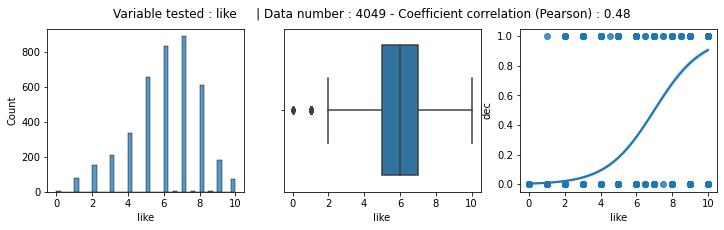

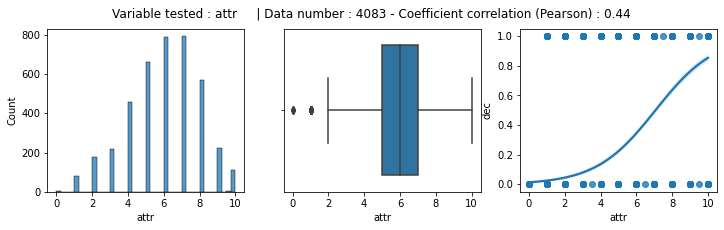

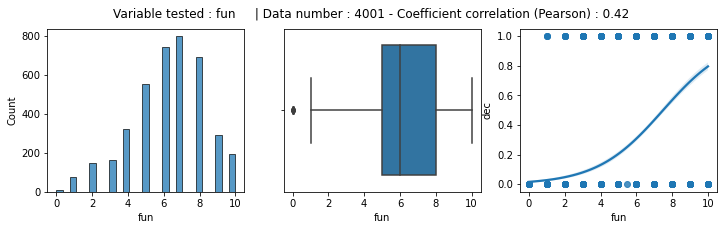

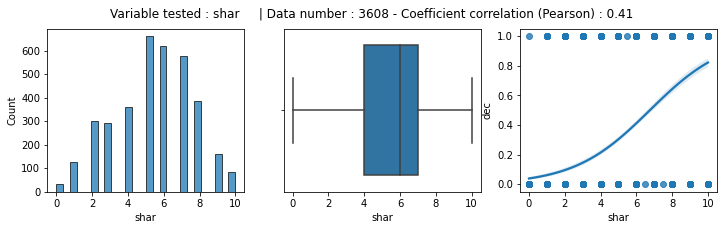

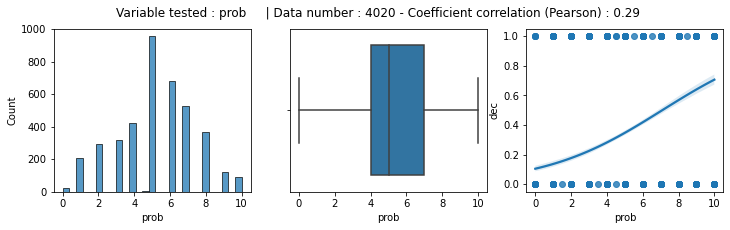

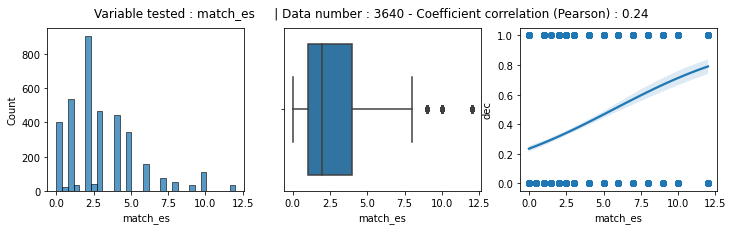

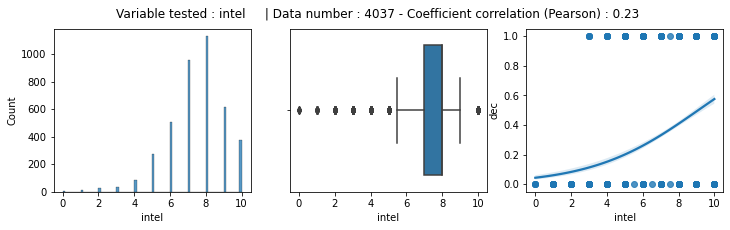

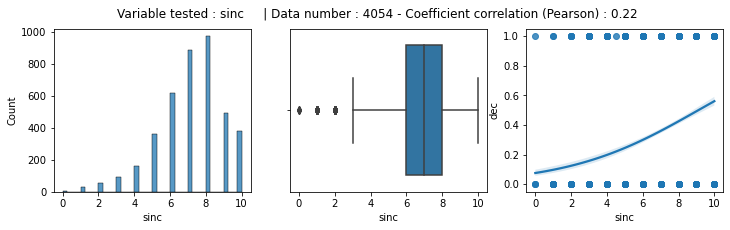

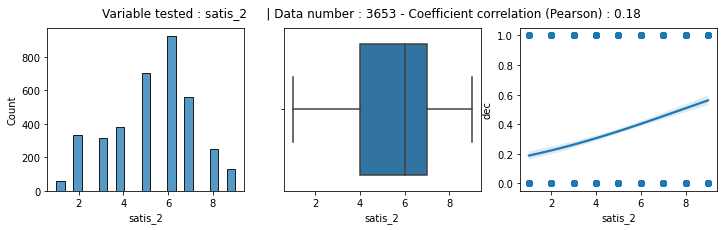

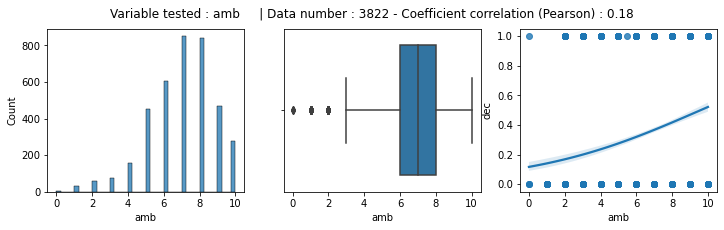

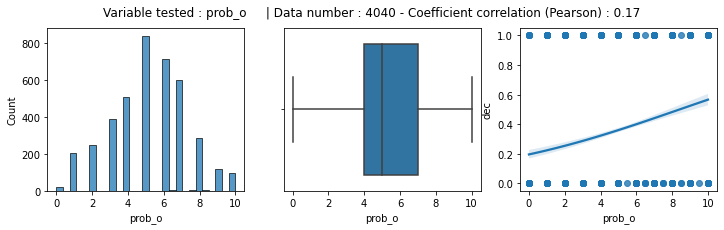

In [9]:
display_distrib_all_corr_top(data_women,top_dec_women,'dec')

The interest is to visualize a context favorable to a "bad" correlation:
- an abnormal distribution of the variable (not very uniform, for example... or very tight)
- presence of many outliers
- insufficient data
- a low Pearson correlation coefficient
...
Each item in this list may not be a problem, but the combination of several problems may lead us to reconsider the quality of the correlation.
For example, here, sincerity, ambition and intelligence, already at the bottom of our "podium", seem to be even lower... "Match_es" too.


Finally, putting aside the "like", we should retain the parameters: Attraction, Fun and Shared Hobbies.
And maybe, in a second time, "prob" and "satis_2"... which should be interesting parameters to study, in a next other experiment...

Now, the same thing for men :

In [14]:
data_men=data_src.loc[data_src['gender']==1,:]
not_selectionned = ['dec','match','them_cal','date_3']
top_dec_men = correlation_top(data_men,'dec',not_selectionned,0.15)
top_dec_men

like        0.544448
attr        0.515497
fun         0.407360
shar        0.387368
prob        0.340901
amb         0.219542
intel       0.216818
match_es    0.205258
sinc        0.190859
satis_2     0.174032
Name: dec, dtype: float64

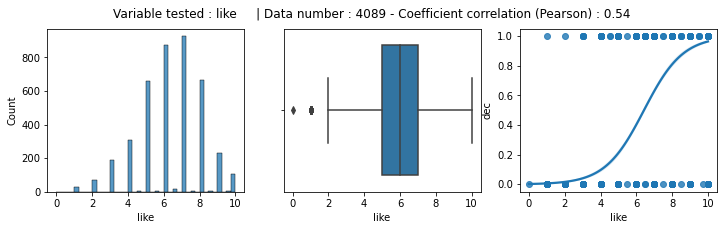

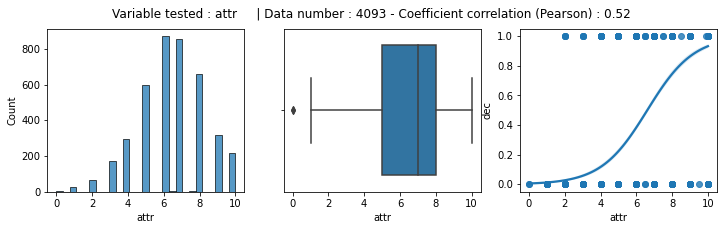

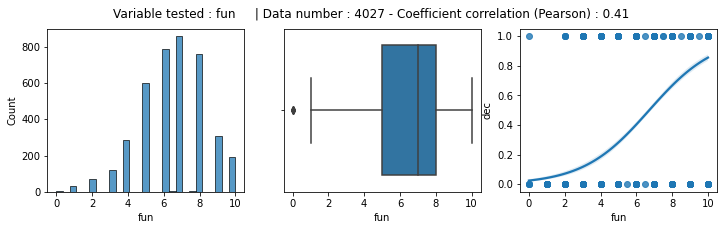

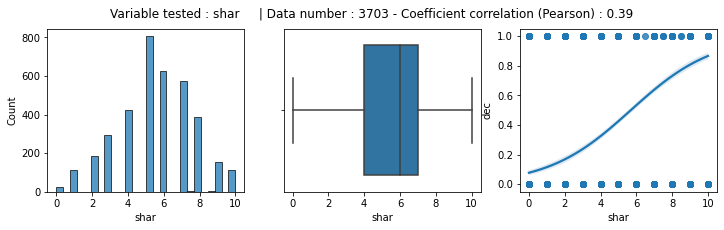

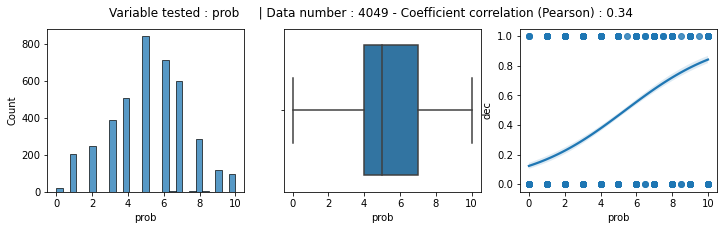

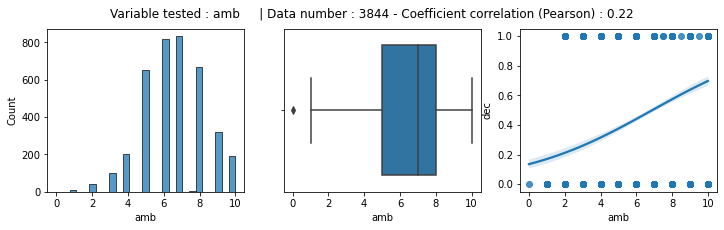

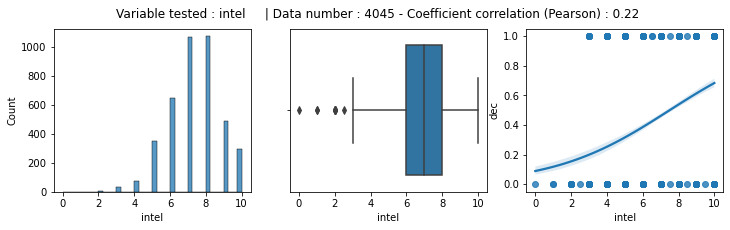

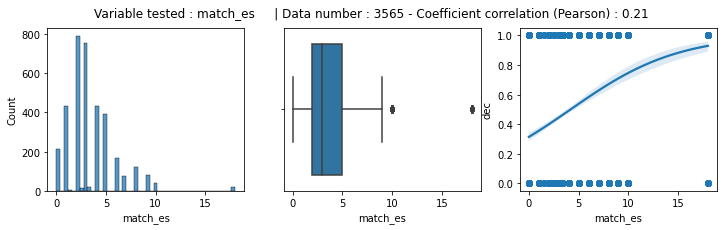

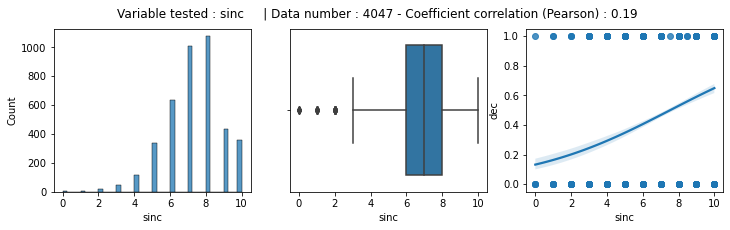

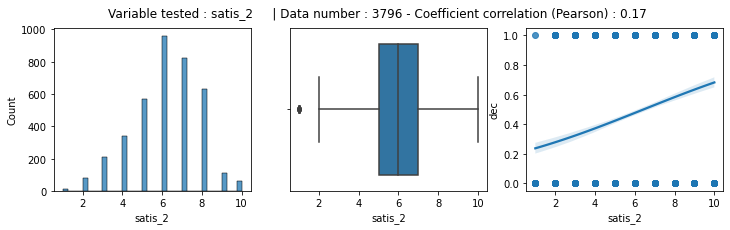

In [11]:
display_distrib_all_corr_top(data_men,top_dec_men,'dec')

For men, we find the same first trio: Attractive, Fun and Shared Interests/Hobbies...
(Attractiveness is even more correlated for men: 0.51 against 0.44 for women! )
And, in a second time, we find the same variables: the "second trio" (Intelligence, Sincerity and Ambition), the expectation of "match", the global satisfaction (again there seems to be a bad correlation) and the "prob"...

OK, we have identified the best parameters to produce a "match", and it is the same for men and women... and that is not very surprising...
But, if we focus on these variables (attr/sinc/etc...), are these variables important in a second time: when the speed dating evening is over and we have to see if the "match" will become a "second date"? This is the subject of the third part...

### PART 3 // How a "match" can become a second date ?

A "match" between a woman and a man, during the speed dating evening, is not everything... it is just a sharing of phone numbers. During the 3/4 weeks following this evening, men and women will have appointments or not, and, in the experiment, only will answer new surveys... 

To begin with, we need to check whether the scoring variables (attr/sinc/etc...) during speed dating will be important for getting a second date.
This is not very easy because "date_3" is the binary answer to the question: "Did you get a date with any of your partners?" and not: "Did you get a date with THIS partner?" (the partner in the row in the dataset)... So, we can simply measure the probability of having a second appointment after 3/4 weeks on a personal basis.

(We could make a large joined table between the dataset and the same dataset a second time, and select the people with "match"=1 to do that... We tried it! But it was not very efficient, unfortunately... for the same reasons as the method below. We keep here the solution which has the simplest form)

So, let's study what kind of variable is correlated with "date_3"...
Will the rating variables be as important as in the second part (the speed dating party)?...


We could begin by find all the top parameters correlated with "date_3"... and see if rathings variables are always in best positions (it is wath we'll do later) but before that, it's an occasion to try an other tool in our toolbox :

In [15]:
def rep_by_step(list_tested):

    data_match = data_src.loc[data_src['match']==1,:]

    data_with_date = data_match.loc[data_match['date_3']==1,:]

    data_melted_base = data_src.melt(id_vars=['gender'],value_vars=list_tested,value_name='Charac').groupby(['gender','variable']).mean().reset_index()
    data_melted_base['Cat']='Base population - Nb data : {}'.format(min(data_src[list_tested].count()))

    data_melted_with_match = data_match.melt(id_vars=['gender'],value_vars=list_tested,value_name='Charac').groupby(['gender','variable']).mean().reset_index()
    data_melted_with_match['Cat']='with match - Nb data : {}'.format(min(data_match[list_tested].count()))

    data_melted_with_date = data_with_date.melt(id_vars=['gender'],value_vars=list_tested,value_name='Charac').groupby(['gender','variable']).mean().reset_index()
    data_melted_with_date['Cat']='With second date 3/4 weeks - Nb data : {}'.format(min(data_with_date[list_tested].count()))

    data_for_viz = pd.concat([data_melted_base,data_melted_with_match,data_melted_with_date]).reset_index()
    data_for_viz['gender']=data_for_viz['gender'].map({0:'Women',1:'Men'})
    fig = px.line(data_for_viz,
            x='variable',
            y='Charac',
            color='gender',
            facet_col='Cat',
            color_discrete_sequence=['#eebbaa','#4488dd'],
            title="Rates repartition (Selection Effect)"
            )
    fig.show()

The rep_by_step function is a visualization function that will display the evolution of the mean of the distribution of a set of variables (the input list) during the experiment:
- for the first time, in the whole population (with or without "match")
- then, in the population of women and men who had a "match" during the speed dating evening
- and finally, in the population that had a "second date" (date_3).
This allows us to check if there is some kind of "natural selection" or "selection effect" during these three stages.

(The function is a little complex because we have to use "melt" and "groupby" methods for each of the "conditionnal" dataset )

Let's try this with our "rathings variables"...

In [18]:
list_tested=['attr','sinc','intel','fun','amb','shar','like']
rep_by_step(list_tested)

Here we can observe, in another way, the impact of the "rating variables" on the "match" variable... People (men and women) who have a "match" have distributed higher scores for all characteristics. The change is most dramatic for the characteristics Attraction, Pleasure, Shared Hobbies, and others... the best variables we have identified so far.

But between step 2 ("match") and step 3 ("date_3"), it seems that there is no difference... 
Perhaps ratings variables will play less in the final result ?...

And be careful, look at the number of data:
there is a strong reduction of the population!... So it will be difficult not to misinterpret the process. (a variation between step 1 and step 2, or step 2 and step3, will be perhaps just an "expression of the variance" to a smaller sample each time.)

Now, we try also to use the same method than part 2 with women who have a "match", and study if she have a "second date", with the function "correlation_top" (our podium of correlation) :

In [21]:
data_women_with_match = data_women.loc[data_women['match']==1,:]
not_selectionned = ['date_3','them_cal']
top_dec_women_with_match = correlation_top(data_women_with_match,'date_3',not_selectionned,0.2)
top_dec_women_with_match

intel1_s    0.281337
hiking      0.267089
shar1_3     0.255144
age         0.251929
clubbing    0.236266
intel2_2    0.204942
satis_2     0.203723
sinc5_1    -0.212878
imprelig   -0.221695
amb3_s     -0.231850
fun3_3     -0.231962
fun3_s     -0.232330
sinc1_s    -0.237886
intel3_s   -0.240003
sinc3_s    -0.254137
fun5_2     -0.268032
intel5_2   -0.302085
amb5_1     -0.330441
amb5_2     -0.388358
Name: date_3, dtype: float64

OK, it is less obvious than in part 2, at the speed dating party...
But there are a lot of variables of the same correlation importance that are different in nature: activities, survey response, importance of religion...

A very important note: the whole family of "rathings variables" (attr/sinc/etc...) is gone!
This is a confirmation of the above with the visualization of the selection "step by step".
Two interpretations:
- (The mathematical explanation) As it was said, "date_3" measures the success of a person on all possible second dates... So, all his/her evaluations on all his/her partners are considered in the same way... This may end up like a soup of ratings: impossible to separate the "good" ratings (for "good dates") from the others.
- (the sociological explanation) Perhaps the ratings don't play too much after the speed dating evening because persons have get to know each other during the 3/4 weeks (by phone, before a possible second date)

Let's see that with men :

In [22]:
data_men_with_match = data_men.loc[data_men['match']==1,:]
not_selectionned = ['date_3','them_cal','you_call']
top_dec_men_with_match = correlation_top(data_men_with_match,'date_3',not_selectionned,0.2)
top_dec_men_with_match

fun4_1      0.366890
amb2_1      0.351253
intel2_3    0.301327
sinc4_2     0.281944
intel1_s    0.275250
amb2_3      0.268660
intel4_3    0.263527
sinc5_2     0.252278
fun4_3      0.241554
intel4_1    0.238080
fun1_s      0.235437
shar1_1    -0.209508
clubbing   -0.212482
amb1_3     -0.213231
met        -0.218140
attr3_s    -0.218161
shar1_2    -0.239083
career_c   -0.241752
concerts   -0.249135
imprace    -0.267317
shar2_2    -0.292145
gaming     -0.320386
shar2_1    -0.320624
Name: date_3, dtype: float64

It's the same kind of results... It's difficult to disentangle all of it.

So we will organise the variables in three categories wich will studied alternatly.

#### 3.1 Impact of activities on a second date

In [23]:
activies=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']


For the activities list, we can use our function correlation_top with a list of not_selectionned but alos with a tested list : the list of activities...

In [24]:
data_women_with_match_activities = data_women_with_match.loc[:,[term for term in data_women_with_match if term in activies or term =='date_3']]
not_selectionned = ['date_3']
top_dec_women_with_match_activities = correlation_top(data_women_with_match_activities,'date_3',not_selectionned,0.1)
top_dec_women_with_match_activities

hiking      0.267089
clubbing    0.236266
yoga        0.148552
exercise    0.101881
theater    -0.155348
concerts   -0.176123
shopping   -0.178434
tv         -0.180073
music      -0.190224
Name: date_3, dtype: float64

Good job! Maybe for a woman, hiking, clubbing, yoga and exercise are good characteristics to reinforce a "match" (have a "date_3"...) and the others don't help.

But the correlations are low, and we have to check it with a visualization :

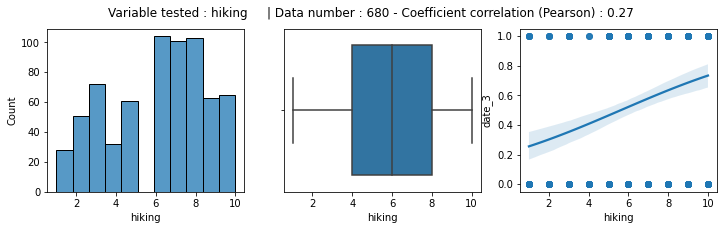

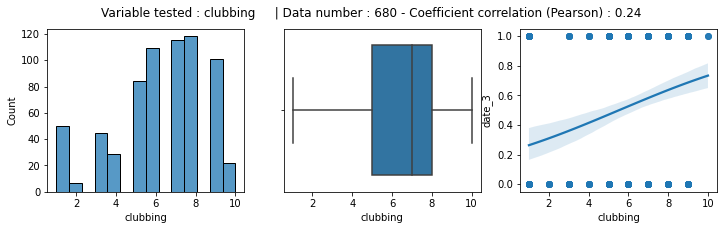

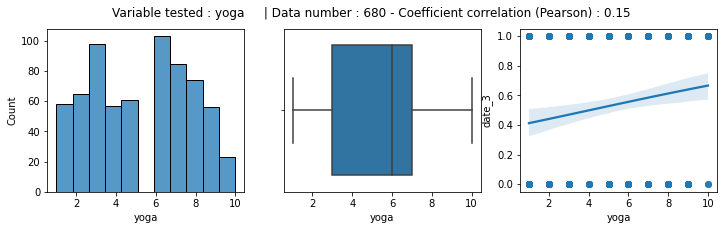

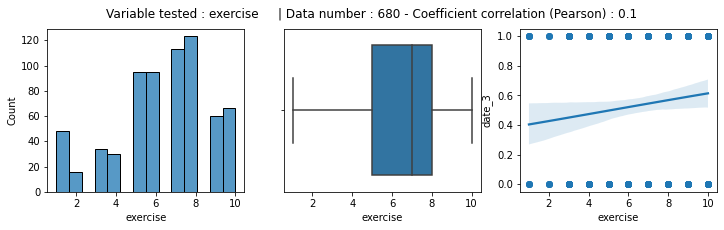

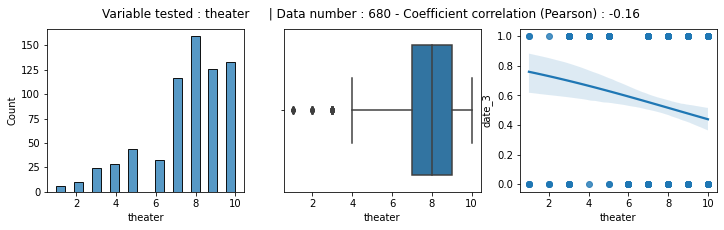

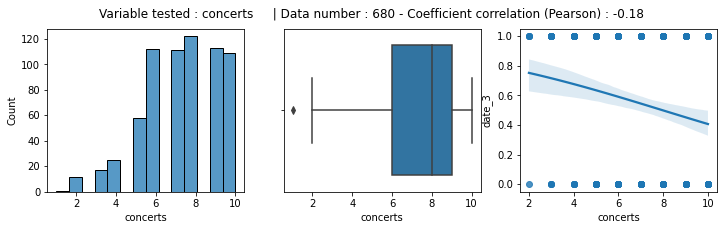

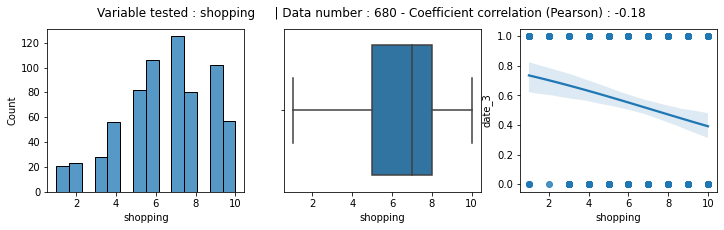

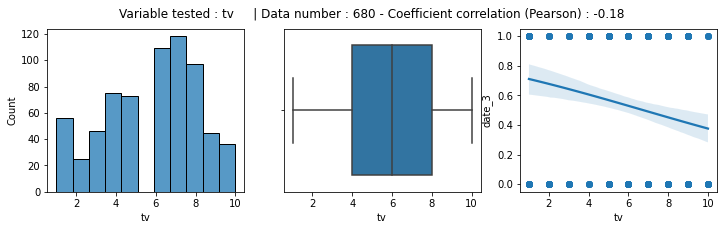

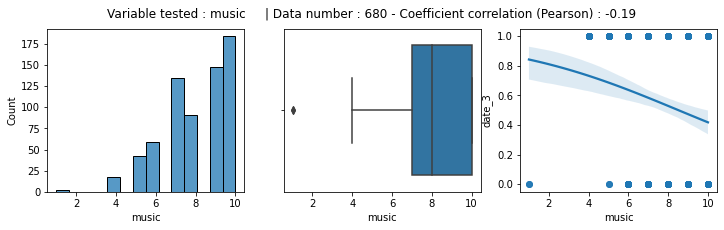

In [25]:
display_distrib_all_corr_top(data_women_with_match_activities,top_dec_women_with_match_activities,'date_3')

Despite the fact that we only have 680 encounter cases for women who have a "match" (number of data in the entire visualization), it would be possible that we have a positive correlation with: hiking, clubbing, maybe yoga... (exercise too low).
And maybe (it is less sure!) a negative correlation with: music, TV, shopping, concerts, theater...
The first activities may be shared with men, in general (hiking first) while the second, perhaps, are activities of individual or specific taste (music, TV) or activities that men do not like much (shopping, theater) in general.

And for men :

In [27]:
data_men_with_match_activities = data_men_with_match.loc[:,[term for term in data_men_with_match if term in activies or term =='date_3']]
not_selectionned = ['date_3']
top_dec_men_with_match_activities = correlation_top(data_men_with_match_activities,'date_3',not_selectionned,0.1)
top_dec_men_with_match_activities

reading     0.140059
museums    -0.103525
tv         -0.120499
dining     -0.136331
movies     -0.168572
clubbing   -0.212482
concerts   -0.249135
gaming     -0.320386
Name: date_3, dtype: float64

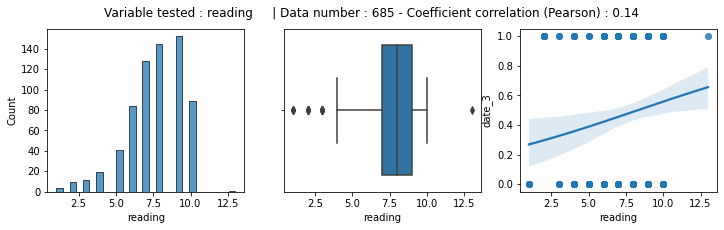

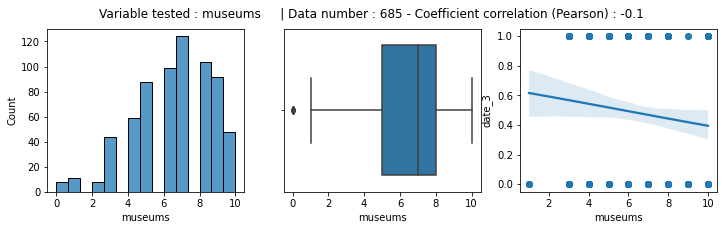

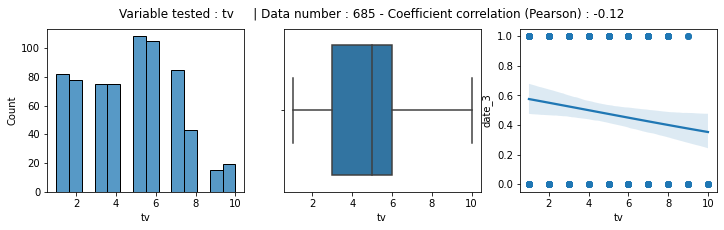

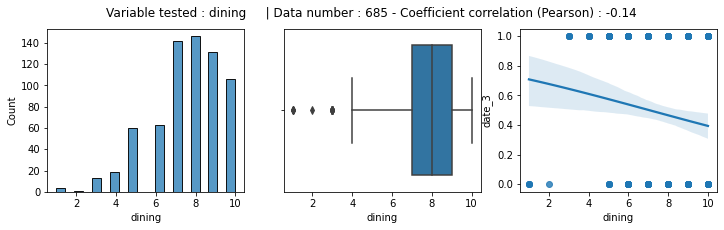

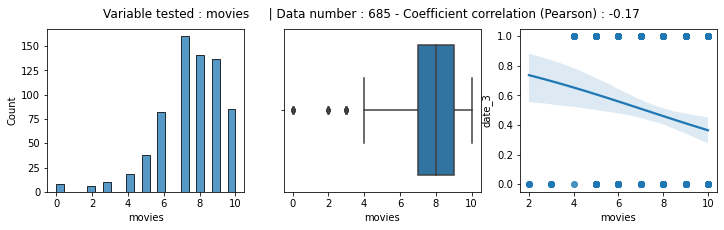

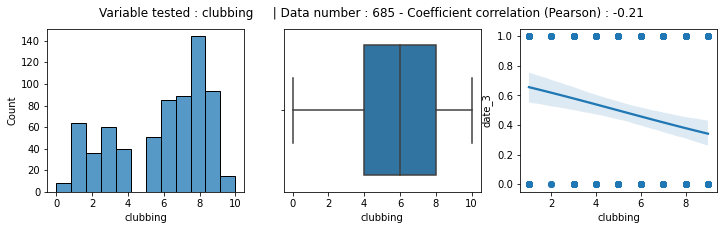

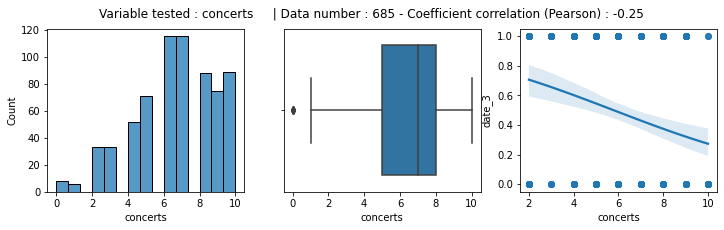

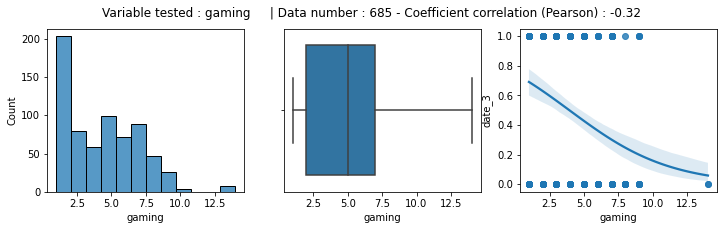

In [28]:
display_distrib_all_corr_top(data_men_with_match_activities,top_dec_men_with_match_activities,'date_3')

For men, we have a lot of negative correlation !
If we don't retain "dining", "theater", "museums" and "tv" (too low coefficients)...
we perhaps can keep "movies", "clubbing", "concerts" and "gaming" ! (for it, the correlation is greater !), very personal, masculine activities (okay, if movies are perhaps "men movies" and concerts are perhaps "men concerts" ?...)

Let's finish hazardous assumptions and let's see visualization with our function rep_by_step :

In [29]:
list_tested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music','shopping','yoga']
rep_by_step(list_tested)

Ok, the tree courbes are very stables !...
The only significant difference is for men : in the step 3, they play a litte less at video games... (but it's not a preponderant activity at least) and there is a little difference too with concerts and clubbings...
But all of this it perhaps a variance case : if we read that from right to the left (data : 359 -> data : 1365 -> data : 8299), it seems like a stabilization of the mean of all responses !...

#### 3.2 Impact of "others" variable in a second date

In [23]:
others = ['met','imprace','age','imprelig']

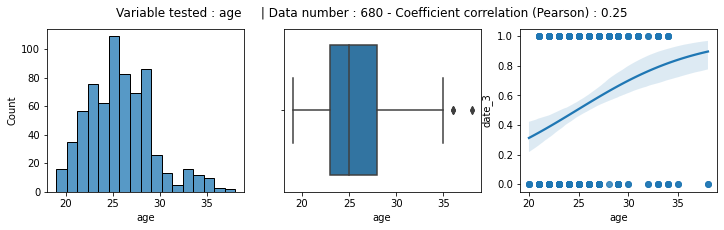

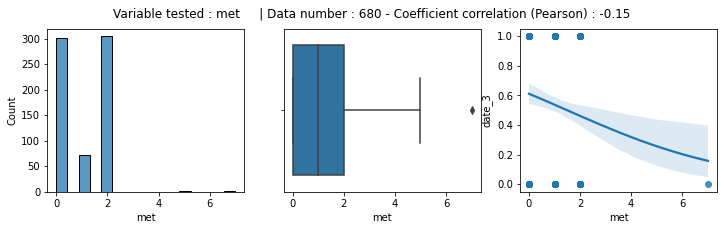

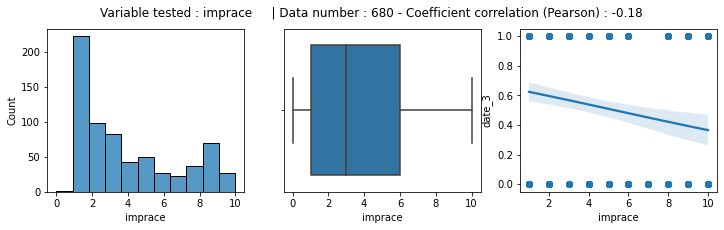

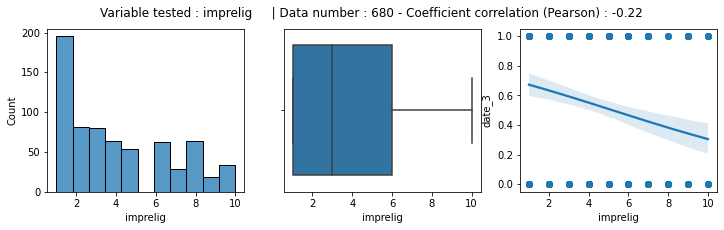

In [24]:
data_women_with_match_others = data_women_with_match.loc[:,[term for term in data_women_with_match if term in others or term =='date_3']]
not_selectionned = ['date_3']
top_dec_women_with_match_others = correlation_top(data_women_with_match_others,'date_3',not_selectionned,0.1)
display_distrib_all_corr_top(data_women_with_match_others,top_dec_women_with_match_others,'date_3')

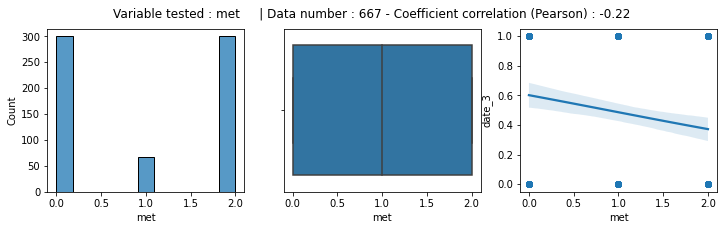

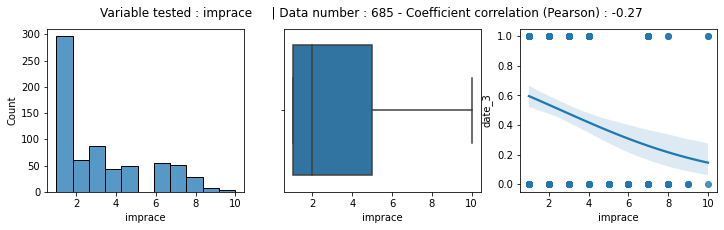

In [25]:
data_men_with_match_others = data_men_with_match.loc[:,[term for term in data_men_with_match if term in others or term =='date_3']]
not_selectionned = ['date_3']
top_dec_men_with_match_others = correlation_top(data_men_with_match_others,'date_3',not_selectionned,0.1)
display_distrib_all_corr_top(data_men_with_match_others,top_dec_men_with_match_others,'date_3')

In [80]:
bad_survey=['attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s','attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3']

In [81]:
mask=(data_women_with_match['wave']<5) | (data_women_with_match['wave']>9)
data_women_with_match_clean_survey = data_women_with_match.loc[mask,[term for term in data_women_with_match if term not in bad_survey and term not in activies and term not in others]]
not_selectionned = ['date_3','them_cal','pid','iid','wave','fun2_2','fun3_3','amb3_3']
top_dec_women_with_match_survey = correlation_top(data_women_with_match_clean_survey,'date_3',not_selectionned,0.20)
top_dec_women_with_match_survey

attr3_3     0.287386
shar1_3     0.267026
intel5_1    0.261502
attr5_2     0.249207
satis_2     0.208954
fun2_1      0.202144
match_es   -0.209339
attr2_2    -0.254531
amb5_2     -0.323964
amb5_1     -0.332976
Name: date_3, dtype: float64

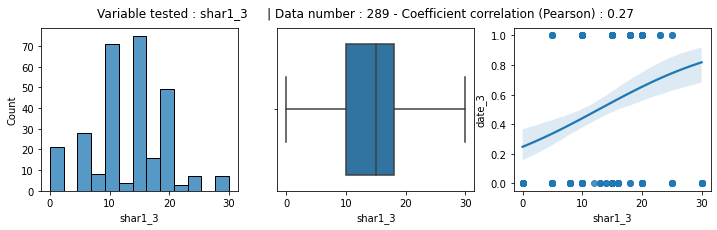

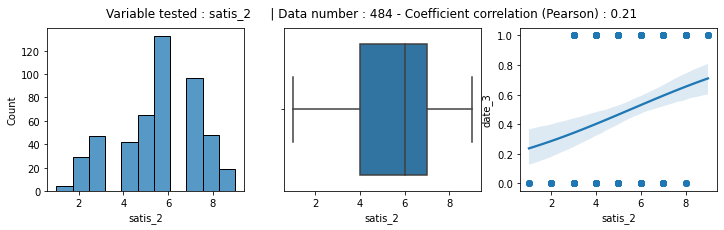

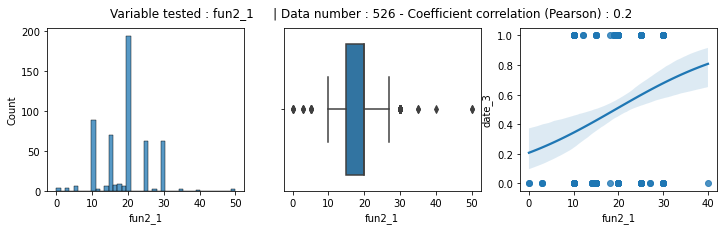

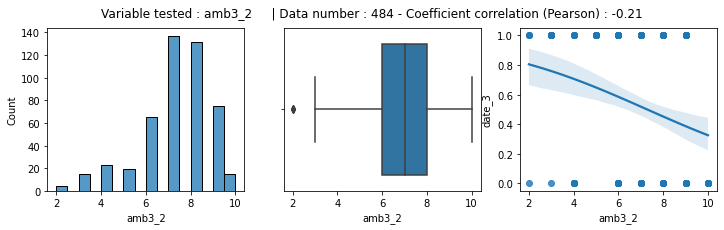

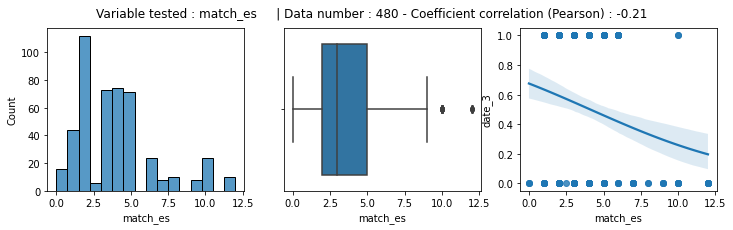

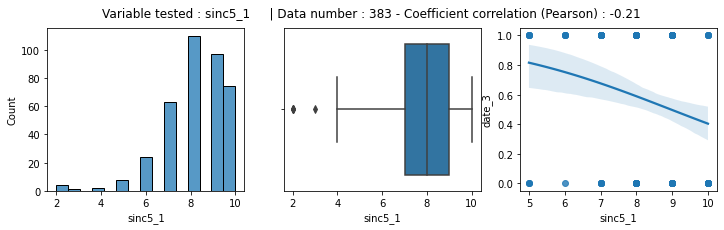

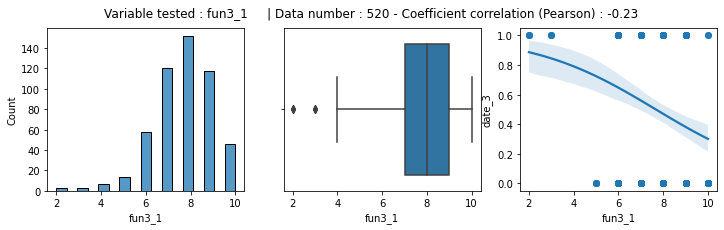

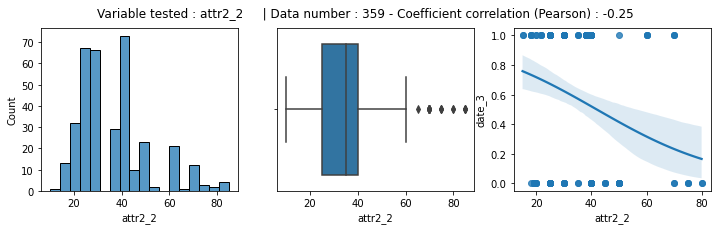

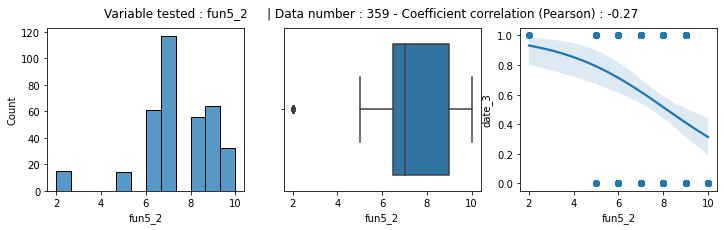

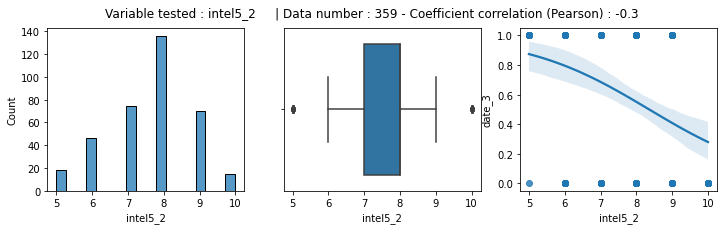

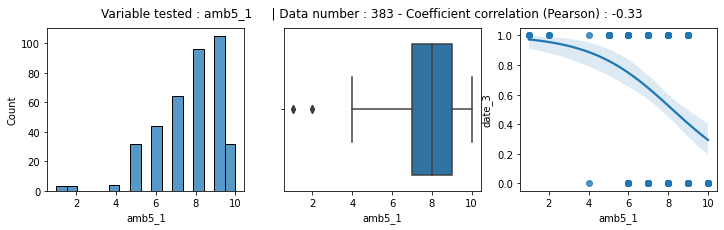

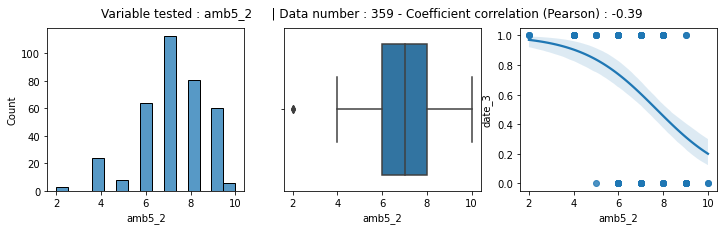

In [28]:
display_distrib_all_corr_top(data_women_with_match_clean_survey,top_dec_women_with_match_survey,'date_3')

In [82]:
mask=(data_men_with_match['wave']<5) | (data_men_with_match['wave']>9)
data_men_with_match_clean_survey = data_men_with_match.loc[mask,[term for term in data_men_with_match if term not in bad_survey and term not in activies and term not in others]]
not_selectionned = ['match_es','date_3','them_cal','you_call','condtn','amb2_2','intel2_2','shar2_2','shar1_2','career_c','field_cd']
top_dec_men_with_match_survey = correlation_top(data_men_with_match_clean_survey,'date_3',not_selectionned,0.2)
top_dec_men_with_match_survey

amb2_1          0.410134
Diff_shar2_1    0.320293
Diff_shar2_2    0.254051
sinc1_3         0.247454
intel1_2        0.225889
attr2_2        -0.216472
attr3_3        -0.227808
attr3_1        -0.245640
shar1_1        -0.250465
Diff_fun3_2    -0.256492
exphappy       -0.297630
Diff_amb2_1    -0.327174
shar2_1        -0.362323
Name: date_3, dtype: float64

KeyboardInterrupt: 

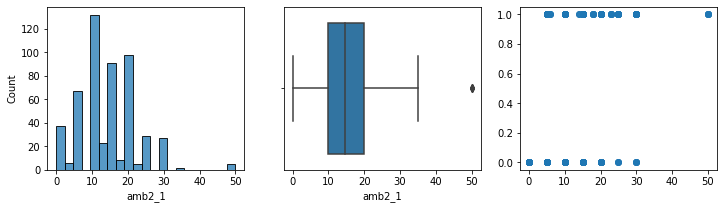

In [83]:
display_distrib_all_corr_top(data_men_with_match_clean_survey,top_dec_men_with_match_survey,'date_3')

In [84]:
charac_list=['attr','sinc','intel','fun','amb','shar']
combi_list=[(1,1),(1,2),(1,3),(2,1),(2,2),(3,1),(3,2),(3,3),(5,1),(5,2)]
charac_list_for_3_and_5=['attr','sinc','intel','fun','amb']
for i,j in combi_list:
    if i == 3 or i == 5 :
        list_tested=['{}{}_{}'.format(term,i,j) for term in charac_list_for_3_and_5]
    else:
        list_tested=['{}{}_{}'.format(term,i,j) for term in charac_list]
    rep_by_step(list_tested)

In [85]:
charac_list_for_3_and_5=['attr','sinc','intel','fun','amb']
combi_list=[(3,1),(3,2),(3,3),(5,1),(5,2)]

nb_char = len(charac_list_for_3_and_5)

for tup_combi in combi_list:

    Matrix=np.empty((nb_char,len(data_src)))

    Result=np.empty((nb_char,len(data_src)))

    for i, term in enumerate(charac_list_for_3_and_5):

        Matrix[i] = data_src['{}{}_{}'.format(term,tup_combi[0],tup_combi[1])].to_numpy()


    for j in range(len(data_src)):

        mean_rate = np.mean([Matrix[i][j] for i in range(nb_char)])

        for i in range(nb_char):

            if mean_rate != np.nan:

                Result[i][j] = (Matrix[i][j]*nb_char*4)/mean_rate

    for i, term in enumerate(charac_list_for_3_and_5):
    
        data_src['{}{}_{}'.format(term,tup_combi[0],tup_combi[1])]=Result[i]

In [33]:
data_src.to_csv("data_src_with_norm_3_5.csv")

In [86]:
charac_list=['attr','sinc','intel','fun','amb','shar']
combi_list=[(2,1),(2,2),(3,1),(3,2),(3,3),(5,1),(5,2)]

for i,j in combi_list:
    if i == 3 or i == 5 :
        list_surveys=['{}{}_{}'.format(term,i,j) for term in charac_list_for_3_and_5]
    else:
        list_surveys=['{}{}_{}'.format(term,i,j) for term in charac_list]
        
    for term in list_surveys:
        data_src['Diff_{}'.format(term)]=data_src['pf_o_{}'.format(term[0:3])]-data_src[term]


In [87]:
data_src.to_csv("data_src_with_diffs.csv")

In [88]:
fig = px.histogram(data_src,x='Diff_attr3_1')
fig.show()

In [89]:
data_women = data_src.loc[data_src['gender']==0,:]
not_selectionned=list_column.values
top_dec_women = correlation_top(data_women,'dec_o',not_selectionned,0.08)
top_dec_women

Diff_fun2_1   -0.080456
Diff_fun5_2   -0.100268
Name: dec_o, dtype: float64

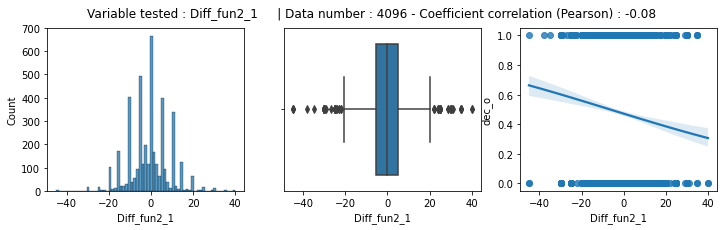

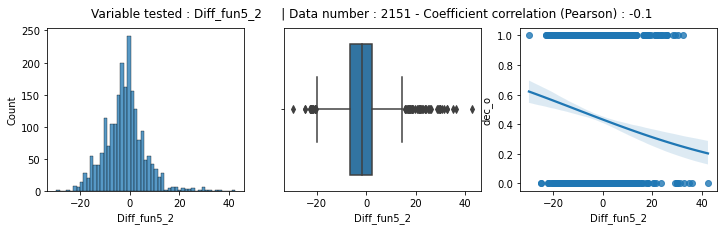

In [39]:
display_distrib_all_corr_top(data_women,top_dec_women,'dec_o')

In [90]:
data_men = data_src.loc[data_src['gender']==1,:]
not_selectionned=list_column.values
top_dec_men = correlation_top(data_men,'dec_o',not_selectionned,0.1)
top_dec_men

Diff_attr5_2   -0.100559
Diff_attr3_3   -0.110562
Diff_attr2_2   -0.114091
Diff_attr2_1   -0.129855
Name: dec_o, dtype: float64

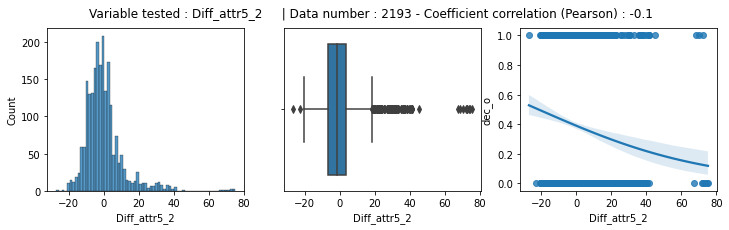

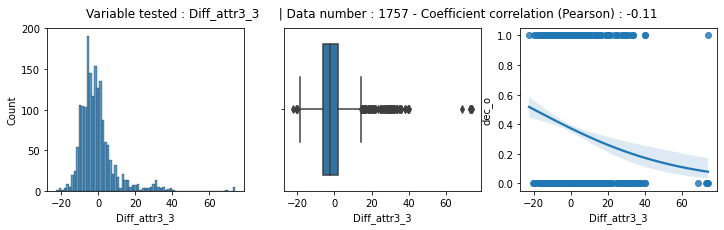

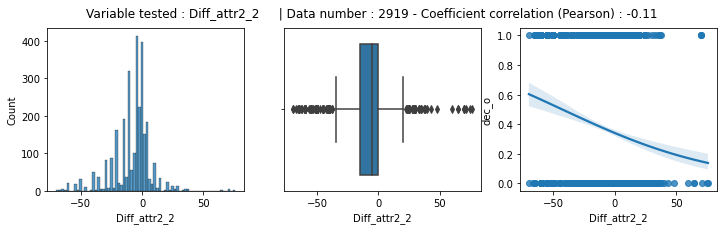

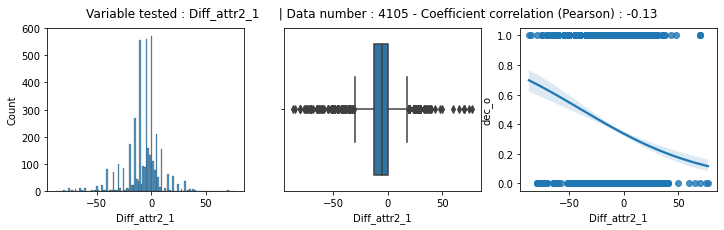

In [41]:
display_distrib_all_corr_top(data_men,top_dec_men,'dec_o')

In [91]:
data_women_with_match = data_women.loc[data_women['match']==1,:]
not_selectionned = list_column.values
top_dec_women_with_match = correlation_top(data_women_with_match,'date_3',not_selectionned,0.1)
top_dec_women_with_match

Diff_amb5_2      0.149960
Diff_amb5_1      0.143238
Diff_attr2_2     0.130499
Diff_intel2_2   -0.115134
Diff_fun2_1     -0.129301
Name: date_3, dtype: float64

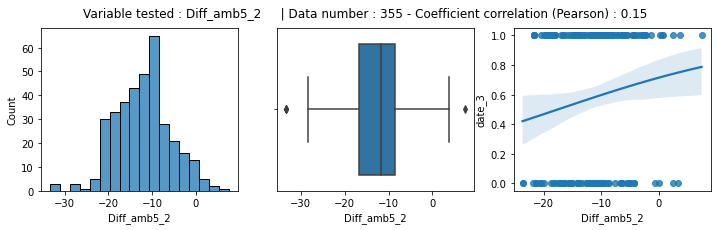

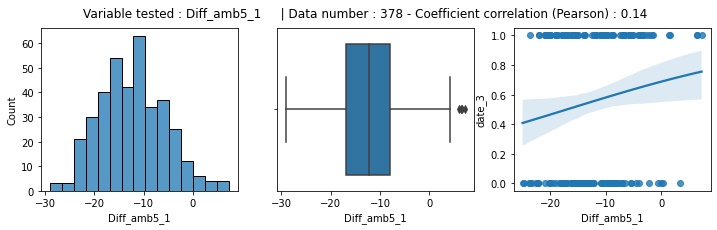

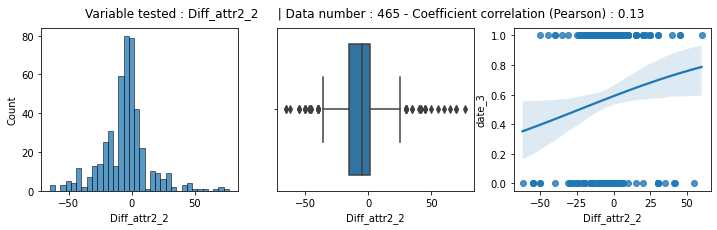

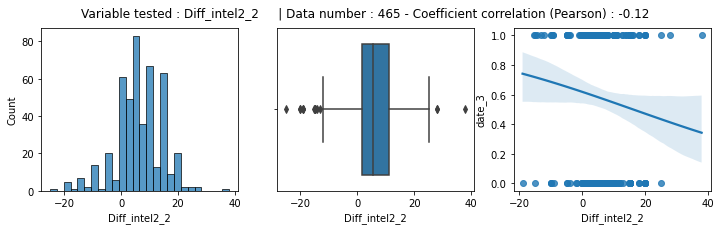

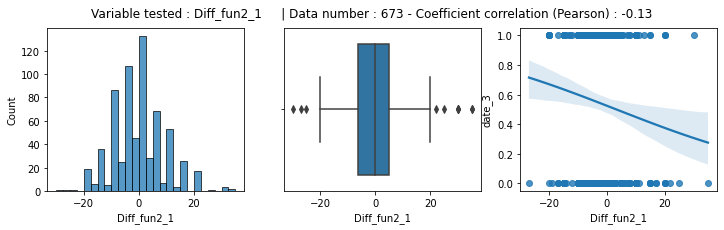

In [43]:
display_distrib_all_corr_top(data_women_with_match,top_dec_women_with_match,'date_3')

In [92]:
data_men_with_match = data_men.loc[data_men['match']==1,:]
not_selectionned = list_column.values
top_dec_men_with_match = correlation_top(data_men_with_match,'date_3',not_selectionned,0.10)
top_dec_men_with_match

Diff_shar2_1    0.265002
Diff_shar2_2    0.210982
Diff_amb3_2     0.102217
Diff_fun3_3    -0.139058
Diff_fun3_1    -0.159158
Diff_fun5_2    -0.171370
Diff_amb2_2    -0.176436
Diff_fun5_1    -0.181294
Diff_fun3_2    -0.204380
Diff_amb2_1    -0.314674
Name: date_3, dtype: float64

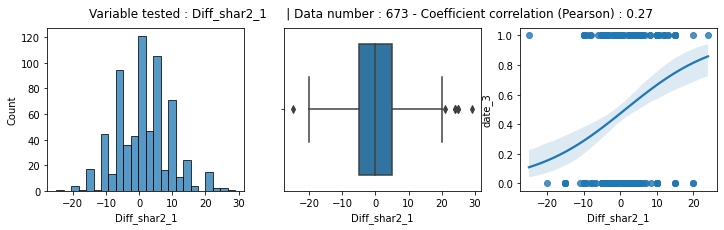

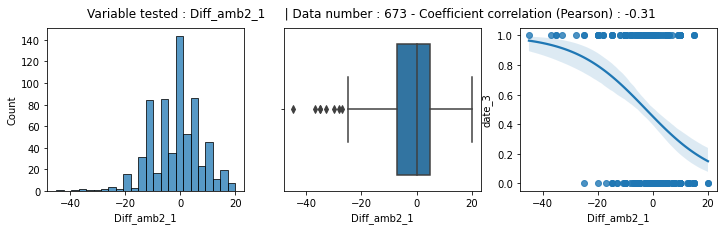

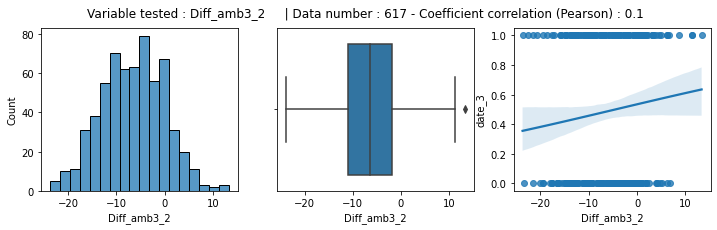

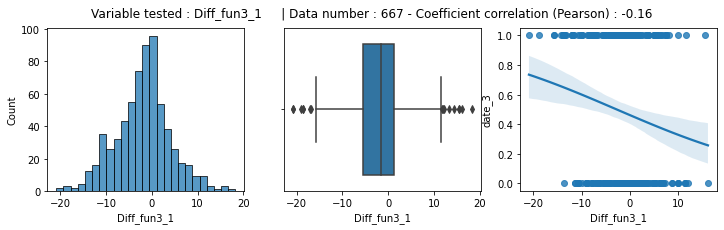

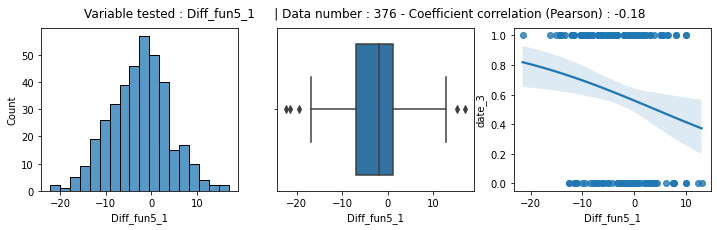

In [45]:
display_distrib_all_corr_top(data_men_with_match,top_dec_men_with_match.loc[['Diff_shar2_1','Diff_amb2_1','Diff_amb3_2','Diff_fun3_1','Diff_fun5_1']],'date_3')

In [64]:
rep_by_step(['Diff_amb2_1','Diff_attr2_1','Diff_sinc2_1','Diff_fun2_1','Diff_intel2_1'])

In [65]:
rep_by_step(['Diff_amb3_1','Diff_attr3_1','Diff_sinc3_1','Diff_fun3_1','Diff_intel3_1'])

In [66]:
rep_by_step(['Diff_amb5_1','Diff_attr5_1','Diff_sinc5_1','Diff_fun5_1','Diff_intel5_1'])

In [93]:
list_column = pd.DataFrame(data_src.columns)

In [94]:
charac_list=['attr','sinc','intel','fun','amb','shar']

for i in [2,3,5]:
    if i == 3 or i == 5 :
        list_surveys=charac_list_for_3_and_5
    else:
        list_surveys=charac_list
        
    for term in list_surveys:
        data_src['Evol_{}{}'.format(term,i)]=data_src['{}{}_2'.format(term,i)]-data_src['{}{}_1'.format(term,i)]

In [71]:
data_src.to_csv("data_src_with_Evolsss.csv")

In [111]:
data_women_with_match = data_src.loc[(data_src['gender']==0) & (data_src['match']==1),:]
not_selectionned = list_column.values
top_dec_women_with_match = correlation_top(data_women_with_match,'date_3',not_selectionned,0.15)
top_dec_women_with_match

Evol_attr5     0.237400
Evol_sinc5     0.184986
Evol_sinc2     0.172848
Evol_fun2     -0.202681
Evol_intel5   -0.395347
Name: date_3, dtype: float64

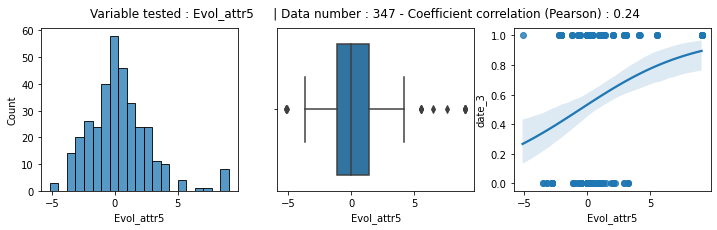

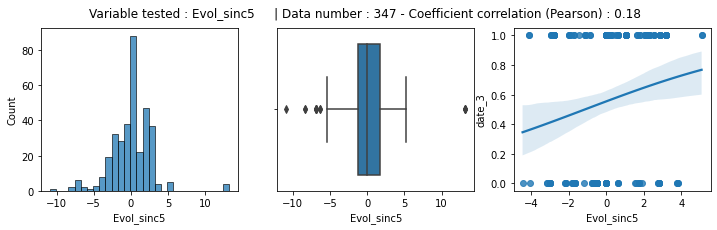

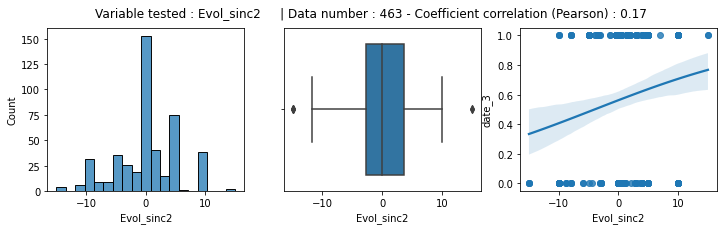

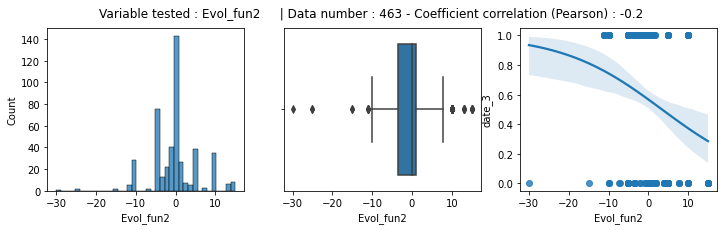

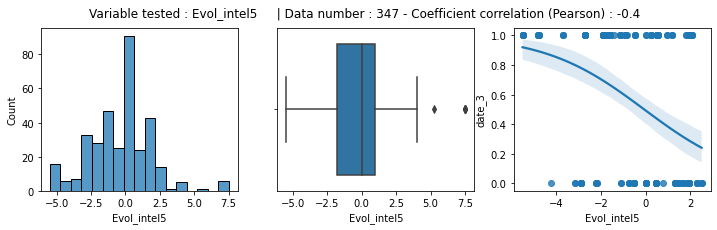

In [112]:
display_distrib_all_corr_top(data_women_with_match,top_dec_women_with_match,'date_3')

In [114]:
data_men_with_match = data_src.loc[(data_src['gender']==1) & (data_src['match']==1),:]
not_selectionned = list_column.values
top_dec_men_with_match = correlation_top(data_men_with_match,'date_3',not_selectionned,0.10)
top_dec_men_with_match

Evol_attr2    0.128971
Evol_fun5    -0.165753
Evol_amb2    -0.198570
Name: date_3, dtype: float64

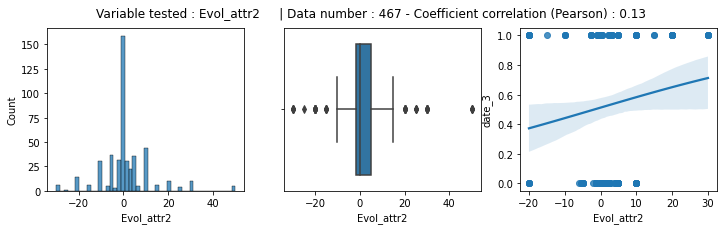

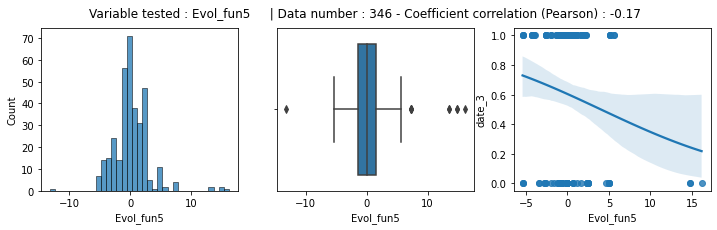

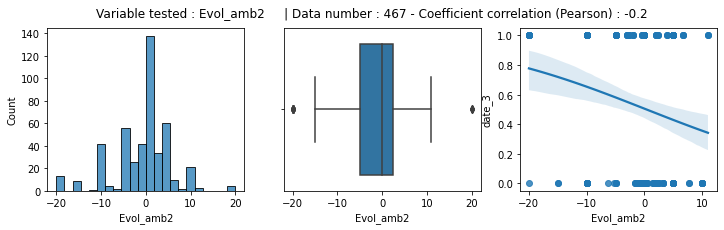

In [115]:
display_distrib_all_corr_top(data_men_with_match,top_dec_men_with_match,'date_3')

In [117]:
rep_by_step(['Evol_amb2','Evol_attr2','Evol_sinc2','Evol_fun2','Evol_intel2','Evol_shar2'])

In [116]:
rep_by_step(['Evol_amb5','Evol_attr5','Evol_sinc5','Evol_fun5','Evol_intel5'])

In [118]:
rep_by_step(['Evol_amb3','Evol_attr3','Evol_sinc3','Evol_fun3','Evol_intel3'])